In [114]:
from model_lomba import *
import matplotlib.pyplot as plt
import seaborn as sns

map_width = 50
map_height = 50
moore = False
model = switching_model(num_of_motorist=50,num_of_stations=10,inv_size=10,cp_size= 10,width=map_width,height=map_height,moore=moore, configuration="normal")

#Dalam menit
num_of_step = 14*24*60
#num_of_step = 100
for i in range(num_of_step):
    model.step()

9


In [115]:
#Ambil data agent
agent_data = model.datacollector.get_agent_vars_dataframe()
agent_data.head()

Position  Charge Alive  Full_battery  Empty_battery  CP_full  \
Step AgentID                                                                
0    0           None  2600.0  None           NaN            NaN      NaN   
     1           None  2600.0  None           NaN            NaN      NaN   
     2           None  2600.0  None           NaN            NaN      NaN   
     3           None  2600.0  None           NaN            NaN      NaN   
     4           None  2600.0  None           NaN            NaN      NaN   

              CP_empty  
Step AgentID            
0    0             NaN  
     1             NaN  
     2             NaN  
     3             NaN  
     4             NaN

In [116]:
motorist_alive = agent_data.xs(num_of_step-1,level = "Step")["Alive"]
motorist_id = []
for motor in model.motorists:
    motorist_id.append(motor.unique_id)
motorist_alive[motorist_id]

AgentID
230     True
231     True
232     True
233     True
234     True
235     True
236     True
237     True
238     True
239    False
240    False
241     True
242     True
243     True
244     True
245     True
246     True
247     True
248     True
249    False
250     True
251     True
252     True
253     True
254     True
255     True
256     True
257     True
258     True
259     True
260     True
261     True
262     True
263     True
264     True
265     True
266     True
267     True
268     True
269     True
270     True
271     True
272     True
273     True
274     True
275    False
276     True
277     True
278    False
279     True
Name: Alive, dtype: object

In [117]:

agent_pos = agent_data.xs(0,level = "Step")["Position"]
station_id = []
for stat in model.stations:
    station_id.append(stat.unique_id)
station_pos = agent_pos[station_id]
print(station_pos)

AgentID
280      (0, 0)
281     (49, 0)
282     (0, 49)
283    (49, 49)
284    (24, 24)
285     (24, 0)
286    (24, 49)
287     (0, 24)
288    (49, 24)
Name: Position, dtype: object


In [118]:
step_station = num_of_step-1
#step_station = 0
agent_full = agent_data.xs(step_station,level = "Step")["Full_battery"]
station_id = []
for stat in model.stations:
    station_id.append(stat.unique_id)
station_full = agent_full[station_id]
print(station_full)

AgentID
280    10.0
281    10.0
282    10.0
283    10.0
284     7.0
285    10.0
286    10.0
287    10.0
288    10.0
Name: Full_battery, dtype: float64


In [119]:
agent_empty = agent_data.xs(step_station,level = "Step")["Empty_battery"]
station_id = []
for stat in model.stations:
    station_id.append(stat.unique_id)
station_empty = agent_empty[station_id]
print(station_empty)

AgentID
280    0.0
281    0.0
282    0.0
283    0.0
284    3.0
285    0.0
286    0.0
287    0.0
288    0.0
Name: Empty_battery, dtype: float64


In [120]:
agent_cp_full = agent_data.xs(step_station,level = "Step")["CP_full"]
station_id = []
for stat in model.stations:
    station_id.append(stat.unique_id)
station_cp_full = agent_cp_full[station_id]
print(station_cp_full)

AgentID
280     7.0
281     6.0
282    10.0
283     5.0
284     0.0
285     5.0
286     6.0
287     2.0
288     7.0
Name: CP_full, dtype: float64


In [121]:
agent_cp_empty = agent_data.xs(step_station,level = "Step")["CP_empty"]
station_id = []
for stat in model.stations:
    station_id.append(stat.unique_id)
station_cp_empty = agent_cp_empty[station_id]
print(station_cp_empty)

AgentID
280     3.0
281     4.0
282     0.0
283     5.0
284    10.0
285     5.0
286     4.0
287     8.0
288     3.0
Name: CP_empty, dtype: float64


In [122]:
#Ambil data motorist
driver_num = 1
motorist_pos = agent_data.xs(model.motorists[driver_num].unique_id, level = "AgentID")["Position"]
motorist_pos.head()
motorist_pos.tail()

Step
20155    (48, 17)
20156    (47, 17)
20157    (47, 16)
20158    (47, 17)
20159    (46, 17)
Name: Position, dtype: object

Text(0, 0.5, 'y')

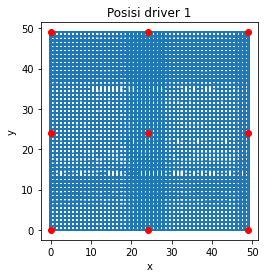

In [123]:
#Coba plot posisi
x_coor = []
y_coor = []
for coor in motorist_pos:
    x_coor.append(coor[0])
    y_coor.append(coor[1])



plt.plot(x_coor,y_coor)
for i in range(model.num_of_stations):
    plt.plot(model.stations[i].pos[0],model.stations[i].pos[1],color = "red", marker = 'o')
plt.xlim([0,map_width])
plt.ylim([0,map_height])
plt.title('Posisi driver ' + str(driver_num))
plt.axis('scaled')
plt.xlabel('x')
plt.ylabel('y')

<AxesSubplot:xlabel='Step'>

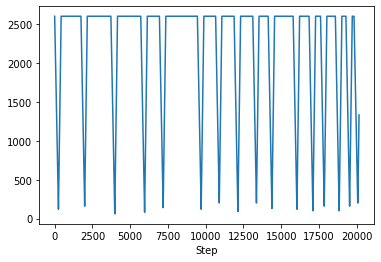

In [124]:
#Cek baterai
battery_id = 0
battery_energy = agent_data.xs(battery_id, level = "AgentID")["Charge"]
battery_energy.plot()



In [125]:
model_data = model.datacollector.get_model_vars_dataframe()
model_data.tail()

,num_of_alive
20155,45
20156,45
20157,45
20158,45
20159,45


Text(0.5, 0, 'Steps')

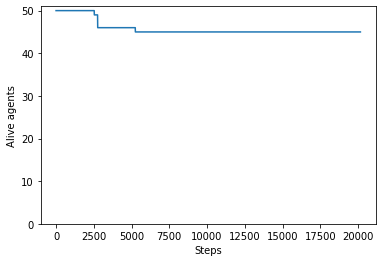

In [126]:
plt.plot(model_data)
plt.ylim([0,51])
plt.ylabel("Alive agents")
plt.xlabel("Steps")

In [127]:
a = [1,2,3]
b = a
b.remove(3)
print(a)

[1, 2]


In [128]:
print(agent_data.columns.tolist())

['Position', 'Charge', 'Alive', 'Full_battery', 'Empty_battery', 'CP_full', 'CP_empty']


In [129]:


#dapetin semua motor
motorist_id = []
for mot in model.motorists:
    motorist_id.append(mot.unique_id)

#ID motor pertama dan terakhir
first_motor = min(motorist_id)
last_motor = max(motorist_id)

#Ambil data motor doang
motorist_data = agent_data.loc[(agent_data.index.get_level_values('AgentID')>=first_motor) & (agent_data.index.get_level_values('AgentID') <=last_motor)]


motorist_alive_position = motorist_data.loc[motorist_data['Alive'] == True]["Position"]
motorist_alive_position.tail()

#print jumlah baris
print(len(motorist_alive_position.index))

923240


In [130]:
array_alive_positions = motorist_alive_position.tolist()
print(len(array_alive_positions))

923240


Text(33.0, 0.5, 'y')

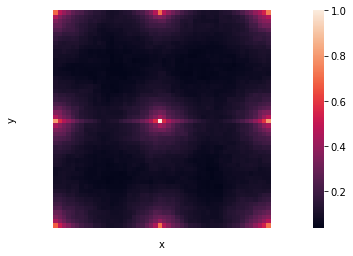

In [131]:
heatmap_data = np.zeros((model.grid.width, model.grid.height))
for coor in array_alive_positions:
    x,y = coor
    heatmap_data[x,y] +=1

most_frequent = np.amax(heatmap_data)
norm_heatmap_data = heatmap_data/most_frequent

ax = sns.heatmap(norm_heatmap_data)
ax.invert_yaxis()
plt.axis('equal')
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
plt.tick_params(left = False, bottom = False)
ax.set_xlabel('x')
ax.set_ylabel('y')



    